In [146]:
#import imp library

from urllib.request import urlopen
from bs4 import BeautifulSoup as soup

In [147]:
#reading url
httpObject = urlopen("https://www.flipkart.com/q/best-laptops-under-rs-50000")
webdata = httpObject.read()
# print(webdata)

In [148]:
#creating soup object
soup_data = soup(webdata,'lxml')
# print(type(soup_data))

In [149]:
#check all functions
# print(dir(soup_data))

In [150]:
containers = soup_data.find_all('div', class_ = '_2kHMtA')
# print(len(containers))

# print(dir(containers))

In [151]:
#first
# print(containers[0])

#Extract Information

In [152]:
data = []

for container in containers:
  product = container.find('div', class_ = '_4rR01T').text.split("-")[0].strip()
  price = float(container.find('div', class_ = '_30jeq3 _1_WHN1').text.strip().split('₹')[1].replace(',',''))
  try:
    star = container.find('div', class_ = '_3LWZlK').text
  except:
    star = 0

  box1 = container.find('span', class_ = '_2_R_DZ')
  try:
    ratings = box1.span.contents[0].text.strip().split()[0].replace(',', '')
    reviews = box1.span.contents[2].text.strip().split()[0].replace(',', '')
  except:
    ratings = 0
    reviews = 0

  box2 = container.find_all('div', class_='fMghEO')
  for i in box2:
    items = i.find_all('li', class_='rgWa7D')
    item_values = [j.text for j in items]

    # Assign separate variables for each item
    processor = item_values[0]
    ram = item_values[1]
    operating_system = item_values[2]
    storage = item_values[3]
    display = item_values[4]
    warranty = item_values[5]


    row_data = {
            'product': product,
            'price':price,
            'star':star,
            'rating':ratings,
            'reviews':reviews,
            'processor':processor,
            'ram': ram,
            'operating_system': operating_system,
            'storage': storage,
            'display': display,
            'warranty': warranty
        }
    data.append(row_data)

In [153]:
import pandas as pd

df = pd.DataFrame(data)
df

,product,price,star,rating,reviews,processor,ram,operating_system,storage,display,warranty
0,MSI Core i5 11th Gen,50990.0,4.3,1033,104,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,2 Year Carry-in Warranty
1,MSI Core i9 13th Gen,489990.0,0,0,0,Intel Core i9 Processor (13th Gen),64 GB DDR5 RAM,Windows 11 Operating System,2 TB SSD,43.94 cm (17.3 Inch) Display,2 Year Carry-in Warranty
2,HP 14s Intel Core i3 11th Gen,35990.0,4.3,3067,275,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty
3,HP 15s Intel Core i3 12th Gen,41990.0,4.3,743,101,Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,Microsoft Office Home & Student 2021
4,MSI Core i5 11th Gen,49990.0,4,35,4,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,Windows 11 Operating System,1 TB HDD|256 GB SSD,39.62 cm (15.6 Inch) Display,2 Year Carry-in Warranty
5,HP Ryzen 5 Hexa Core 5500U,43490.0,4.3,1991,164,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,"Microsoft Office Home 2019 & Office 365, HP Do..."
6,HP Ryzen 5 Hexa Core 5500U,48990.0,4.3,726,83,AMD Ryzen 5 Hexa Core Processor,16 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,"Microsoft Office 2021 Home & Student, HP Docum..."
7,MSI Core i9 13th Gen,599990.0,0,0,0,Intel Core i9 Processor (13th Gen),64 GB DDR5 RAM,Windows 11 Operating System,4 TB SSD,43.94 cm (17.3 Inch) Display,2 Year Carry-in Warranty
8,HP Ryzen 3 Quad Core 5300U,36499.0,4.2,2458,274,AMD Ryzen 3 Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,"Microsoft Office 2019 & Office 365, HP Documen..."
9,HP Ryzen 5 Hexa Core 5500U,44490.0,4.3,2506,248,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,35.56 cm (14 inch) Display,"Microsoft Office Home & Student 2019, HP Docum..."


#Analysis

In [154]:
df['star'] = df['star'].str.strip()

In [155]:
df['star'] = df['star'].astype(float)

In [156]:
df[df['star'] == df['star'].max()]

,product,price,star,rating,reviews,processor,ram,operating_system,storage,display,warranty
16,MSI Core i5 12th Gen,79990.0,4.9,17,4,Intel Core i5 Processor (12th Gen),16 GB DDR4 RAM,Windows 11 Operating System,1 TB HDD|256 GB SSD,39.62 cm (15.6 Inch) Display,2 Year Carry-in Warranty


In [157]:
df.sort_values(by='star', ascending=False)

,product,price,star,rating,reviews,processor,ram,operating_system,storage,display,warranty
16,MSI Core i5 12th Gen,79990.0,4.9,17,4,Intel Core i5 Processor (12th Gen),16 GB DDR4 RAM,Windows 11 Operating System,1 TB HDD|256 GB SSD,39.62 cm (15.6 Inch) Display,2 Year Carry-in Warranty
10,MSI Core i7 11th Gen,63990.0,4.6,24,0,Intel Core i7 Processor (11th Gen),16 GB DDR4 RAM,Windows 11 Operating System,1 TB HDD|256 GB SSD,39.62 cm (15.6 Inch) Display,2 Year Carry-in Warranty
12,MSI Ryzen 5 Hexa Core 7530U,45990.0,4.4,111,14,AMD Ryzen 5 Hexa Core Processor,16 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,35.56 cm (14 Inch) Display,1 Year Carry-in Warranty
14,HP Ryzen 5 Hexa Core 5500U,42990.0,4.4,22,1,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,1 Year Onsite Warranty
0,MSI Core i5 11th Gen,50990.0,4.3,1033,104,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,2 Year Carry-in Warranty
17,MSI Core i7 11th Gen,72990.0,4.3,483,44,Intel Core i7 Processor (11th Gen),16 GB DDR4 RAM,Windows 11 Operating System,1 TB HDD|256 GB SSD,39.62 cm (15.6 Inch) Display,2 Year Carry-in Warranty
3,HP 15s Intel Core i3 12th Gen,41990.0,4.3,743,101,Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,Microsoft Office Home & Student 2021
21,Lenovo IdeaPad Ryzen 5 Hexa Core 5500U,47990.0,4.3,2058,223,AMD Ryzen 5 Hexa Core Processor,16 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,Microsoft Office Home & Student 2021
5,HP Ryzen 5 Hexa Core 5500U,43490.0,4.3,1991,164,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,"Microsoft Office Home 2019 & Office 365, HP Do..."
6,HP Ryzen 5 Hexa Core 5500U,48990.0,4.3,726,83,AMD Ryzen 5 Hexa Core Processor,16 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,"Microsoft Office 2021 Home & Student, HP Docum..."


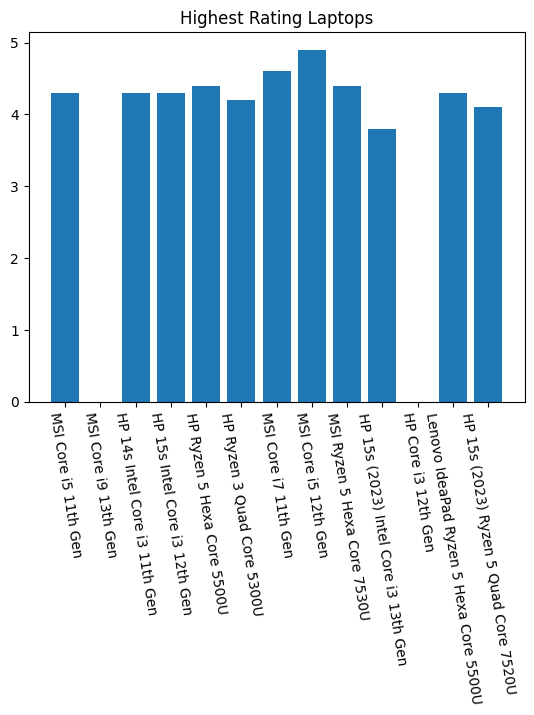

In [158]:
import matplotlib.pyplot as plt

plt.bar(x=df['product'], height=df['star'])
plt.xticks(rotation=279)
plt.title('Highest Rating Laptops')
plt.show()

#Scraping data from all the pages

In [159]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as soup

In [160]:
#reading url
httpObject = urlopen("https://www.flipkart.com/q/best-laptops-under-rs-50000")
webdata = httpObject.read()
soup_data = soup(webdata)

merged_html_data = str(soup_data)

In [161]:
nav_element = soup_data.find('nav', class_='yFHi8N')

if nav_element:
    links = nav_element.find_all('a')
    href_list = ["https://www.flipkart.com" + link['href'] for link in links]

    for url in href_list:
        httpObject = urlopen(url)
        webdata = httpObject.read()
        soup_data = soup(webdata)
        merged_html_data += str(soup_data)


with open("merged_html_file.html", "w") as file:
    file.write(merged_html_data)

In [162]:
with open("merged_html_file.html", "r") as file:
    html_content = file.read()

soup_data = soup(html_content, "html.parser")

In [163]:
containers = soup_data.find_all('div', class_ = '_2kHMtA')

In [164]:
data = []

for container in containers:
  product = container.find('div', class_ = '_4rR01T').text.split("-")[0].strip()
  try:
    price = float(container.find('div', class_ = '_30jeq3 _1_WHN1').text.strip().split('₹')[1].replace(',',''))
  except:
    price = 0
  try:
    star = container.find('div', class_ = '_3LWZlK').text
  except:
    star = 0

  box1 = container.find('span', class_ = '_2_R_DZ')
  try:
    ratings = box1.span.contents[0].text.strip().split()[0].replace(',', '')
    reviews = box1.span.contents[2].text.strip().split()[0].replace(',', '')
  except:
    ratings = 0
    reviews = 0

  box2 = container.find_all('div', class_='fMghEO')
  for i in box2:
    items = i.find_all('li', class_='rgWa7D')
    item_values = [j.text for j in items]

    # Assign separate variables for each item
    processor = item_values[0]
    ram = item_values[1]
    operating_system = item_values[2]
    storage = item_values[3]
    display = item_values[4]
    # warranty = item_values[5]


    row_data = {
            'product': product,
            'price':price,
            'star':star,
            'rating':ratings,
            'reviews':reviews,
            'processor':processor,
            'ram': ram,
            'operating_system': operating_system,
            'storage': storage,
            'display': display
        }
    data.append(row_data)

In [165]:
df = pd.DataFrame(data)
df

,product,price,star,rating,reviews,processor,ram,operating_system,storage,display
0,MSI Core i5 11th Gen,50990.0,4.3,1033,99,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display
1,MSI Core i9 13th Gen,489990.0,0,0,0,Intel Core i9 Processor (13th Gen),64 GB DDR5 RAM,Windows 11 Operating System,2 TB SSD,43.94 cm (17.3 Inch) Display
2,HP 14s Intel Core i3 11th Gen,35990.0,4.3,3067,261,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 inch) Display
3,HP 15s Intel Core i3 12th Gen,41990.0,4.3,743,87,Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display
4,MSI Core i5 11th Gen,49990.0,4,35,4,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,Windows 11 Operating System,1 TB HDD|256 GB SSD,39.62 cm (15.6 Inch) Display
...,...,...,...,...,...,...,...,...,...,...
283,HP Ryzen 3 Quad Core 7320U,39490.0,3.7,11,1,AMD Ryzen 3 Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display
284,HP Core i3,42990.0,0,0,0,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,35.56 cm (14 Inch) Display
285,HP Laptop Ryzen 3 Quad Core 5300U,38990.0,4.4,92,11,AMD Ryzen 3 Quad Core Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display
286,HP Laptop with Backlit Keyboard Core i3 11th Gen,41490.0,4.3,315,36,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display
